In [1]:
########################################################################################################
####################################### FOR TESTING ####################################################
########################################################################################################

In [2]:
#!/usr/bin/env python3

In [1]:
from gensim.models import Word2Vec
from procrustes import smart_procrustes_align_gensim
import numpy as np
import pandas as pd
from spacy.lang.en import English
from scipy.spatial.distance import cosine
import os
import statistics
nlp = English(pipeline=[])
nlp.add_pipe("sentencizer")

In [2]:
def get_sentences(text: str) -> list[list[str]]:
    """Split the specified text into sentences, consisting of text tokens."""

    sents = []

    # We process the text in chunks by paragraph, ensuring that a sentence
    # never crosses a paragraph boundary:
    for para in text.split("\n\n"):
        doc = nlp(para.replace("\n", " "))
        for sent in doc.sents:
            tokens = [
                token.text.lower().strip() for token in sent if not token.is_space
            ]
            sents.append(tokens)

    return sents

In [3]:
def tokenize(corpus_path : str, corpora_path="corpora"):
    """
    Return a tokenized version of the corpus at corpus_path
    """

    # Read and tokenize corpus from disc
    with open(os.path.join(corpora_path, corpus_path)) as f:
        raw = f.read()
        tokenized = get_sentences(raw)
    
    return tokenized

In [9]:
def get_embedding_model(corpus):
    """
    Returns the word2vec embedding of a corpus
    """

    model = Word2Vec(corpus, epochs=25, window=4)
    print("Word2Vec model generated")

    return model

In [8]:
def get_aligned_embedding_spaces(model1: str, model2: str):
    """
    Create an embedding space for corpus1 and corpus 2,
    align corpus 2 to corpus 1, and return their embeddings
    """

    # TODO: ignore words with low frequencies
    # TODO: find ideal threshold

    model2_aligned = smart_procrustes_align_gensim(model1, model2)

    print("Embedding spaces aligned")

    embeddings1 = model1.wv
    embeddings2 = model2_aligned.wv

    return (embeddings1, embeddings2)

In [5]:
def get_least_similar(embeddings1, embeddings2, topn=10, all=False) -> dict:
    """
    Return the topn words with the lowest cosine similarity
    across the two embedding spaces and their similarity score.
    """

    # Get list of tokens used in both embedding spaces (intersection of both vocabularies)
    vocab = list(set(embeddings1.index_to_key) & set(embeddings2.index_to_key)) 

    # Give option to get all tokens
    if all:
        topn = len(vocab)

    # Filter to only tokens that are in both datasets
    vec1 = {token: embeddings1[token] for token in vocab}
    vec2 = {token: embeddings2[token] for token in vocab}

    # Calculate each token's cosine distance across the two embedding spaces
    # Range 0 --> 2 normalized to 0 --> 1
    distances = {token: cosine(vec1[token], vec2[token]) / 2 for token in vocab}

    # Lower index --> less similar
    least_sim = sorted(distances, key=lambda x: distances[x], reverse=True)

    # Get the vectors of the n least similar words across embedding spaces
    top_n_words = least_sim[:topn]
    top_n_dists = {token: distances[token] for token in top_n_words}

    return top_n_dists




In [10]:
corpora_filepath = "corpora_test" # Use "corpora" when running final experiment
corpora = os.listdir(corpora_filepath)
corpus_comparisons = []
embeddings = {}

# Create each embedding model
for corpus in corpora:
    tokens = tokenize(corpus, corpora_path=corpora_filepath)
    embedding = get_embedding_model(tokens)
    embeddings[corpus] = embedding


for corpus1 in corpora:
    for corpus2 in corpora:
        # No point in comparing a corpora's similarity to itself
        if corpus1 == corpus2 or {corpus1, corpus2} in [c["Corpora"] for c in corpus_comparisons]:
            pass
        else:
            
            # Compare two embedding spaces

            print(f"COMPARING: {set((corpus1, corpus2))}")
            
            e1 = embeddings[corpus1]
            e2 = embeddings[corpus2]

            embeddings1, embeddings2 = get_aligned_embedding_spaces(e1, e2)
            
            least_similar = get_least_similar(embeddings1, embeddings2, all=True)

            corpus_comparisons.append({
                "Corpora" : {corpus1, corpus2}, # Since order is not supposed to matter
                "Dissimilarities" : least_similar
            })


            # Display results

            print(f"CORPUS 1: {corpus1}")
            print(f"CORPUS 2: {corpus2}")
            for token in least_similar:
                print(f"TOKEN: {token}    COSINE-DISTANCE: {least_similar[token]}")


Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_fl

Word2Vec model generated


Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'


Word2Vec model generated
COMPARING: {'repText.txt', 'demText.txt'}
7259 7259
7259 7259
Embedding spaces aligned
CORPUS 1: demText.txt
CORPUS 2: repText.txt
TOKEN: tbh    COSINE-DISTANCE: 0.5422157049179077
TOKEN: terribly    COSINE-DISTANCE: 0.5186323523521423
TOKEN: mythical    COSINE-DISTANCE: 0.5182375311851501
TOKEN: conveniently    COSINE-DISTANCE: 0.5170339345932007
TOKEN: researching    COSINE-DISTANCE: 0.5132228136062622
TOKEN: generalize    COSINE-DISTANCE: 0.5099828839302063
TOKEN: erickson    COSINE-DISTANCE: 0.5082263946533203
TOKEN: w/    COSINE-DISTANCE: 0.5080624222755432
TOKEN: temple    COSINE-DISTANCE: 0.5055109262466431
TOKEN: damages    COSINE-DISTANCE: 0.50212162733078
TOKEN: -------------------------------------------------    COSINE-DISTANCE: 0.5017211437225342
TOKEN: observed    COSINE-DISTANCE: 0.49704796075820923
TOKEN: sweet    COSINE-DISTANCE: 0.4962310194969177
TOKEN: gee    COSINE-DISTANCE: 0.49244770407676697
TOKEN: mattered    COSINE-DISTANCE: 0.48828271

In [11]:
# Collect all of the corpus<-->corpus dissimilarities under each token

token_ids = {}

for comparison in corpus_comparisons:
    
    for token in comparison["Dissimilarities"]:

        if token not in token_ids.keys():
            token_ids[token] = []

        token_ids[token].append(comparison["Dissimilarities"][token]) # Adds adds the dissimilarity number for that token

# Find the harmonic mean for those dissimilarities
# We find the harmonic mean so that words that vary 
# across certain communities and not others are not
# weighted too highly

# Tested arithmetic, geometric, harmonic for most "interesting"

whole_corpora_dissimilarity = {id: statistics.mean(token_ids[id]) for id in token_ids}

sorted_distances = sorted(whole_corpora_dissimilarity, key=lambda x: whole_corpora_dissimilarity[x], reverse=True)

# Get the ten highest means
top_distances = sorted_distances[:100]

for token in top_distances:
    print(f"TOKEN: {token}    DISSIMILARITY: {whole_corpora_dissimilarity[token]}")




TOKEN: tbh    DISSIMILARITY: 0.5422157049179077
TOKEN: terribly    DISSIMILARITY: 0.5186323523521423
TOKEN: mythical    DISSIMILARITY: 0.5182375311851501
TOKEN: conveniently    DISSIMILARITY: 0.5170339345932007
TOKEN: researching    DISSIMILARITY: 0.5132228136062622
TOKEN: generalize    DISSIMILARITY: 0.5099828839302063
TOKEN: erickson    DISSIMILARITY: 0.5082263946533203
TOKEN: w/    DISSIMILARITY: 0.5080624222755432
TOKEN: temple    DISSIMILARITY: 0.5055109262466431
TOKEN: damages    DISSIMILARITY: 0.50212162733078
TOKEN: -------------------------------------------------    DISSIMILARITY: 0.5017211437225342
TOKEN: observed    DISSIMILARITY: 0.49704796075820923
TOKEN: sweet    DISSIMILARITY: 0.4962310194969177
TOKEN: gee    DISSIMILARITY: 0.49244770407676697
TOKEN: mattered    DISSIMILARITY: 0.488282710313797
TOKEN: manual    DISSIMILARITY: 0.48167815804481506
TOKEN: bust    DISSIMILARITY: 0.4811210036277771
TOKEN: lightly    DISSIMILARITY: 0.47772684693336487
TOKEN: communism    DISS

In [13]:
#TARGET = "muslims"

targets = []
words = []
values = []
communities = []

for test in top_distances:

    for c in corpora:
        
        e = embeddings[c].wv

        for word, value in e.most_similar(test, topn=10):
            targets.append(test)
            words.append(word)
            values.append(value)
            communities.append(c)


df = pd.DataFrame({
    "Community" : communities,
    "Word" : targets,
    "Neighbor" : words,
    "Similarity" : values
})

In [16]:
df = df[df["Word"] == "researching"]

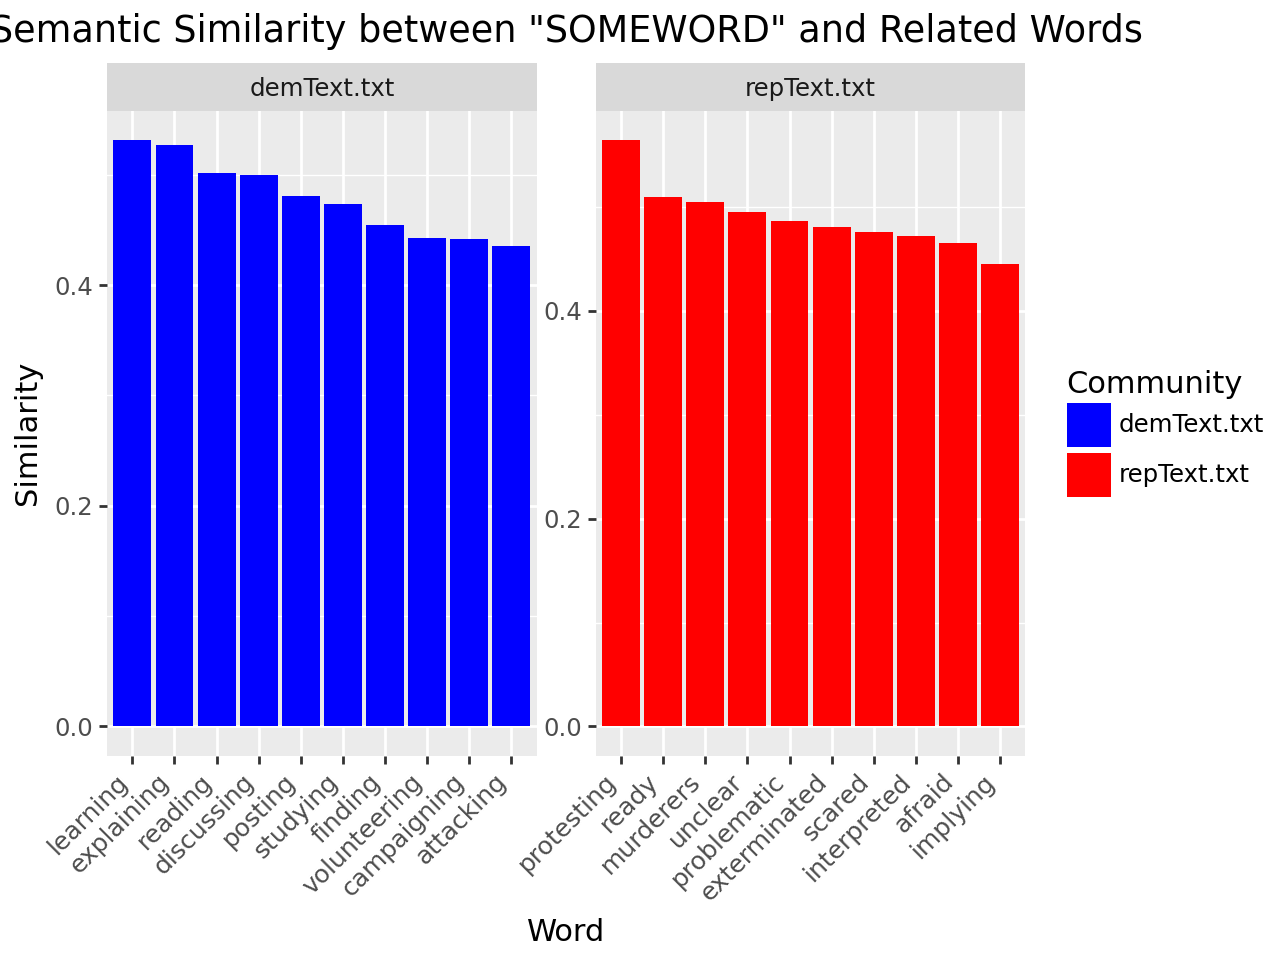

In [17]:
from plotnine import ggplot, aes, geom_col, theme_classic, scale_fill_manual, labs, element_text, theme, facet_wrap

p = (ggplot(df, aes(x="reorder(Neighbor, Similarity, ascending=False)", y="Similarity", fill="Community")) +
 geom_col() +
 scale_fill_manual(values=["blue", "red"]) +
 labs(x="Word", title=f'Semantic Similarity between "SOMEWORD" and Related Words') +
 facet_wrap("~Community", scales="free") +
 theme(axis_text_x=element_text(angle=45, hjust=1, vjust=1, size=9)))

p.show()

#p.save(f"{TARGET}.png")